<a href="https://colab.research.google.com/github/ab2gbl/Master2/blob/main/CSAI/TP/CSAI_tp4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Conception Part

On this lab We are going to use Genetic algorithm on neural network model, we will apply the Genetic Algo to modify our model parameters (weights and biases), cause neural network work by updating the weights and biases until getting the best parameters that work togethere and give best accuracy, and here we going to use Genetic Algo to update this weights and getting a good accuracy.


---










1. **particular:**
The main idea of genetic algo is updating and changing particulars until get the best particular that will give us the best result we searching for.

  Our goal on this lab is getting best accuracy of our model and that mean **"maximising the accuracy"**, so the model is the main target , and that makes us extracting our particular from the model , and the **"biases and weights"** are the main thing we can change on our model and it effect directly on the accuracy.

  So we put all weights and biases on 1 particular, one by one , so they will be ordered from first layer params to last layer params , and we will have a particular like this: `[ weight_1_1, weight_1_2, bias_1_1, weight_2,1 .... bias_n_m ]` until last layer weights and biases

2. **Population:**
Our population will be basically from multi particulars , and in this example we will just use 20 particulars





3. **Fetness:** our Fitness will be the **accuracy** as we said , we give the particuler to the model as weights and biases , and the accuracy is the fitness of the particular

4. **Mutation:** We just change a random element value from our particular ( will be weight or bias ) by a random small number

5. **Crossover:** making 2 children from 2 parents by mixing that parents:
  ```
  child 1 = start of parent 1 + end of parent 2
  
  child 2 = start of parent 2 + end of parent 1
  ```
  so in the end the wights and biases wil change between the 2 parents giving us new 2 particulars


6. **Roulette selection:** Select parents depends on fitness , the parent who has better fitness (bigger) , will have more probability to be selected  

7. **Replacement:** we will select the worst particular , and compare it to the new one , if the new one was better , we will replace the old one by this new one



---



# Implementation part

## 2-1 Prepare Dataset and Model architecture

In [32]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt


In [2]:
def load_and_split_iris():

    iris = load_iris()
    X = iris.data
    y = iris.target

    encoder = OneHotEncoder(sparse_output=False)
    y = encoder.fit_transform(y.reshape(-1, 1))

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = load_and_split_iris()



In [3]:

input_size = 4
hidden_size = 5
output_size = 3

def create_model():
    model = Sequential([
        Dense(hidden_size, input_shape=(input_size,), activation='relu'),
        Dense(output_size, activation='softmax')
    ])
    return model


## 2-2 genetic RNA

In [4]:
# Create and compile the model
model = create_model()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### model and particular relations

In [5]:
# in this methode , we gonna get the weights and biases of our model and convert that to a particular
def model_to_particular(model):

    particular = []
    for layer in model.layers:
        weights, biases = layer.get_weights()   # getting the weights and biases of the layer
        particular.extend(weights.flatten())    # add the weights first
        particular.extend(biases.flatten())     # and then add the biases
    # the particular will be in the next format for example: [weight_1_1, weight_1_2, weight_1_3, bias_1_1 , weight_2_1 ....]
    return np.array(particular)


In [6]:
# this method is to apply the numbers of our particular on our model as weights and biases
def particular_to_model(model, part):

    i = 0
    for layer in model.layers:
        # here we gonna make get the number of weights and biases we have on this layer
        # so for example if we in the first layer, this layer has:
        #                                                           - 3 weights
        #                                                           - 1 bias
        weights_shape = layer.get_weights()[0].shape                # get shape
        biases_shape = layer.get_weights()[1].shape
        weights_size = np.prod(weights_shape)                       # will be 3
        biases_size = np.prod(biases_shape)                         # will be 1

        # and now we gonna get the weights depends on the index on the particular
        # the index will be 0 here ( first layer ), so from the element 0 until 2 ( 3 element cause weights size is 3 )
        weights = part[i:i+weights_size].reshape(weights_shape)
        #print(weights)

        # we got the weights of this layer , now we should go to biases
        # increament the index to pass the elements we got as weight
        i += weights_size               # index is 3 now

        # same as weights , this time will be the biases
        # index is 3 now , so from 3 to 3 ( we have just 1 bias)
        biases = part[i:i+biases_size].reshape(biases_shape)

        # Set the weights and biases for the layer
        layer.set_weights([weights, biases])

        # increament the index to pass to the next layer and do that again
        i += biases_size



### Initial Population

In [7]:
# initial first population for our genetic function
def init_population(model, population_size):

    pop = []

    particular  = model_to_particular(model)  # Get an particular example from our model to know the length
    part_length = particular.shape[0]         # getting the length of the particular

    for _ in range(population_size):
        d
        random_genome = np.random.randn(part_length)   # Create random particular with the same size as the sample particular
        pop.append(random_genome)

    return np.array(pop)


### Fitness Function

In [8]:
# the fitness in this tp will be the accuracy of our model , we need to maximise the accuaracy to get a better model
def fitness_func(model, particular, X, y):

    particular_to_model(model, particular)  # Set the model weights from the particular

    _, accuracy = model.evaluate(X, y, verbose=0)  # Evaluate the model and get the accuarcy
    return accuracy


### Mutatuion function

In [9]:
# mutation of our particular by changing an element value from it
def mutation(particular, rate):

    new_part = particular.copy()
    if random.random() < rate:               # Apply mutation with a given probability
        i=random.randint(1,len(particular)-1)         # getting a random index ( random element to apply mutation on)
        new_part[i] += np.random.normal(0, 0.1)       # Apply a small random change (Gaussian noise)

    return new_part

In [10]:
# mutation test
part = np.array([0.5, -1.2, 3.0, 0.8, -0.7])
print( part)
print( mutation(part, 1))

[ 0.5 -1.2  3.   0.8 -0.7]
[ 0.5        -1.2         3.          0.61442776 -0.7       ]


### Crossover function


In [11]:
# applying the crossover by mixing 2 parents
def crossover_genomes(parent1, parent2, rate):

    if random.random() < rate:
        point = random.randint(1, len(parent1) - 1)       # random point to crossover
        child1 = np.concatenate((parent1[:point], parent2[point:]))   # child1 = start of parent1 + end of parent2
        child2 = np.concatenate((parent2[:point], parent1[point:]))   # child2 = start of parent2 + end of parent1
        return child1, child2
    else:
        # return parents if no crossover
        return parent1.copy(), parent2.copy()

# Test
parent1 = np.array([0.5, -1.2, 3.0, 0.8, -0.7])
parent2 = np.array([-0.4, 2.1, -0.9, 1.3, 0.6])
child1, child2 = crossover_genomes(parent1, parent2, 1.0)
print("Parent 1:", parent1)
print("Parent 2:", parent2)
print("child 1:", child1)
print("child 2:", child2)


Parent 1: [ 0.5 -1.2  3.   0.8 -0.7]
Parent 2: [-0.4  2.1 -0.9  1.3  0.6]
child 1: [ 0.5  2.1 -0.9  1.3  0.6]
child 2: [-0.4 -1.2  3.   0.8 -0.7]


### Roulette selection

In [12]:
# selecting parents depends on the fitness and roulette logic
def select_roulette(population, fitness):

    total_fitness = sum(fitness)
    probabilities = [f / total_fitness for f in fitness]      # calculating the probablity of each element depends on roullette logic

    # select random number between 0 and n when n is last index
    n= len(population)
    selected_index = random.choices(range(n), weights=probabilities, k=1)[0]  # range(n) will be an array: [0,1,2 ... n], and with weights so every index has a probability depends on the probabilties we calculated before
    return population[selected_index]



### Replacement function

In [13]:
# replace the worst particular by the new child if it was better
def replacement(child, population, fitness):



    worst_particular = np.argmin(fitness)                             # Index of the worst particular
    new_fitness = fitness_func(model, child, X_train, y_train)   # fitness of the child

    # Replacement
    if new_fitness > fitness[worst_particular]:
        population[worst_particular] = child
        fitness[worst_particular] = new_fitness

    return population, fitness



### Applying the genetic

In [63]:

# applying the genetic algorithm to update our model weights

def genetic_algorithm(model, X_train, y_train, iterations, pop_size, pc, pm):

    pop = init_population(model, pop_size)    #init population
    fitness_over_time = []

    for iteration in range(iterations):



        # getting best particular and his fitness before each iteration
        fitness = [fitness_func(model, part, X_train, y_train) for part in pop] # fitness of all particulars
        best_index = np.argmax(fitness)                                             # index of best fitness
        best_individual = pop[best_index]                                           # best particular
        best_fitness = fitness[best_index]                                          # his fitness
        fitness_over_time.append(best_fitness)                                      # adding it to the diagram

        print(f"Iteration {iteration+1} - Best Fitness: {best_fitness:.4f}")

        # Selection
        parent1= select_roulette(pop, fitness)
        parent2= select_roulette(pop, fitness)
        # Crossover
        child1, child2 = crossover_genomes(parent1, parent2, pc)
        # Mutation
        child1 = mutation(child1, pm)
        child2 = mutation(child2, pm)
        # Replacement
        pop,_ = replacement(child1, pop, fitness)
        pop,_ = replacement(child2, pop, fitness)

        # Update the population

    # getting best particular and his fitness after last iteration
    fitness = [fitness_func(model, genome, X_train, y_train) for genome in pop]
    best_index = np.argmax(fitness)
    best_individual = pop[best_index]
    best_fitness = fitness[best_index]
    fitness_over_time.append(best_fitness)


    # display diagram of progression
    plt.figure(figsize=(10, 6))
    plt.plot(range(0, iterations + 1), fitness_over_time)
    plt.xlabel("Iteration")
    plt.ylabel("Best Fitness")
    plt.title("Fitness Progression Over Iterations")
    plt.grid(True)
    plt.show()

    return best_individual, best_fitness , fitness_over_time


Iteration 1 - Best Fitness: 0.6250
Iteration 2 - Best Fitness: 0.6250
Iteration 3 - Best Fitness: 0.6250
Iteration 4 - Best Fitness: 0.6250
Iteration 5 - Best Fitness: 0.6250
Iteration 6 - Best Fitness: 0.6250
Iteration 7 - Best Fitness: 0.6250
Iteration 8 - Best Fitness: 0.6250
Iteration 9 - Best Fitness: 0.6333
Iteration 10 - Best Fitness: 0.7333
Iteration 11 - Best Fitness: 0.7333
Iteration 12 - Best Fitness: 0.7333
Iteration 13 - Best Fitness: 0.7333
Iteration 14 - Best Fitness: 0.7333
Iteration 15 - Best Fitness: 0.7333
Iteration 16 - Best Fitness: 0.7333
Iteration 17 - Best Fitness: 0.7333
Iteration 18 - Best Fitness: 0.7333
Iteration 19 - Best Fitness: 0.7333
Iteration 20 - Best Fitness: 0.7333
Iteration 21 - Best Fitness: 0.7333
Iteration 22 - Best Fitness: 0.7333
Iteration 23 - Best Fitness: 0.7333
Iteration 24 - Best Fitness: 0.7333
Iteration 25 - Best Fitness: 0.7333
Iteration 26 - Best Fitness: 0.7333
Iteration 27 - Best Fitness: 0.7333
Iteration 28 - Best Fitness: 0.7333
I

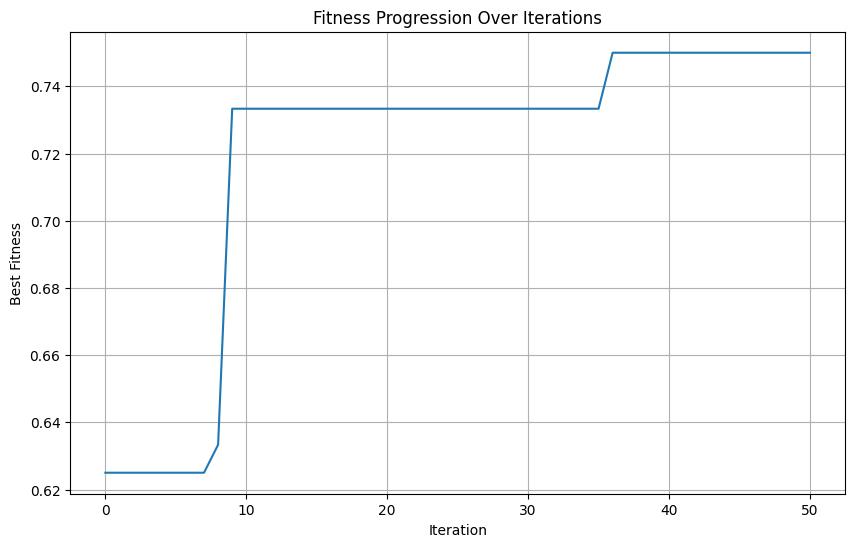

In [65]:
# Genetic Algo Parameters
iterations = 50
pop_size = 20
pc = 0.8  # Crossover probability
pm = 0.1  # Mutation probability

best_particular, best_fitness , fitenss_over_time  = genetic_algorithm(model, X_train, y_train, iterations, pop_size, pc, pm)

# Apply the best paricular on the model
particular_to_model(model, best_particular)


In [66]:

# Evaluate the final model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Best Fitness: {best_fitness:.4f}")
print(f"Test accuracy: {accuracy:.4f}")

Best Fitness: 0.7500
Test accuracy: 0.7333


## 2-3 gradiant model

In [69]:

# Create the model
model_gradiant = create_model()

# Compile the model
model_gradiant.compile(optimizer=Adam(learning_rate=0.01),  # Adam optimizer
              loss='categorical_crossentropy',    # Cross-entropy loss for classification
              metrics=['accuracy'])

# Train the model
history = model_gradiant.fit(X_train, y_train, epochs=50, batch_size=8, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model_gradiant.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.2849 - loss: 1.4280 - val_accuracy: 0.5333 - val_loss: 1.0995
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5133 - loss: 0.9126 - val_accuracy: 0.5667 - val_loss: 0.8002
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5727 - loss: 0.7334 - val_accuracy: 0.6333 - val_loss: 0.6411
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6901 - loss: 0.5882 - val_accuracy: 0.8333 - val_loss: 0.5587
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7698 - loss: 0.5355 - val_accuracy: 0.9333 - val_loss: 0.5001
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8139 - loss: 0.5391 - val_accuracy: 0.9000 - val_loss: 0.4711
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8004 - loss: 0.4737 - val_accuracy: 0.8667 - val_loss: 0.4471
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8235 - loss: 0.5002 - val_accuracy: 0.9333 - val_loss

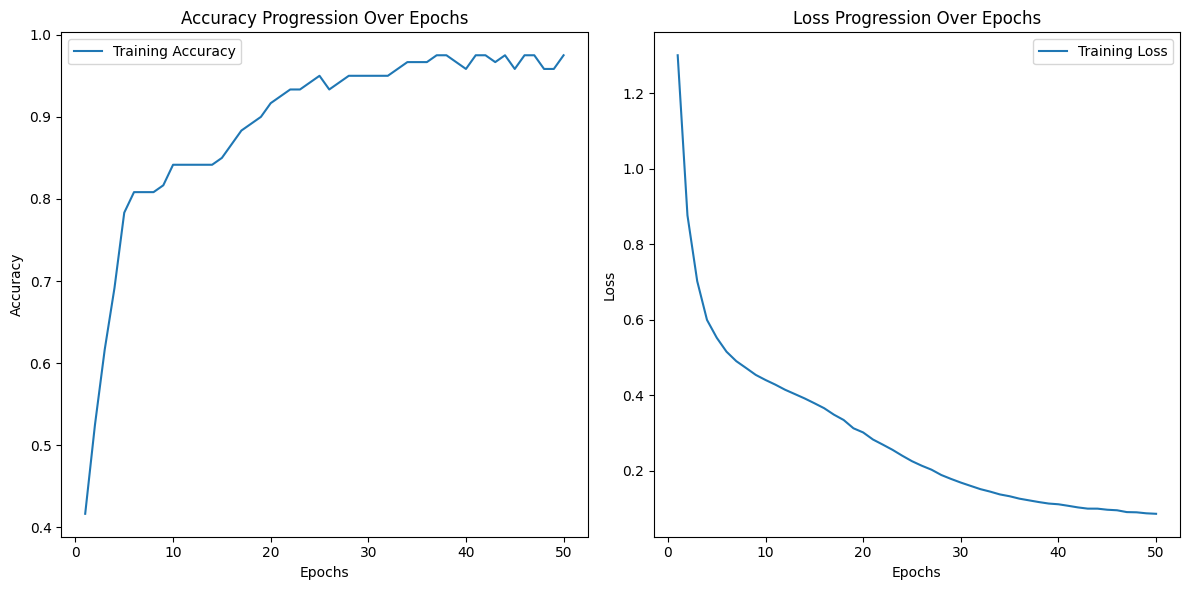

In [70]:
import matplotlib.pyplot as plt

# Extract accuracy and loss from the history object
train_accuracy = history.history['accuracy']
train_loss = history.history['loss']
epochs = range(1, len(train_accuracy) + 1)

# Plot Accuracy Progression
plt.figure(figsize=(12, 6))

# Subplot 1: Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Progression Over Epochs')
plt.legend()

# Subplot 2: Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Progression Over Epochs')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


## 2-4 Comparison

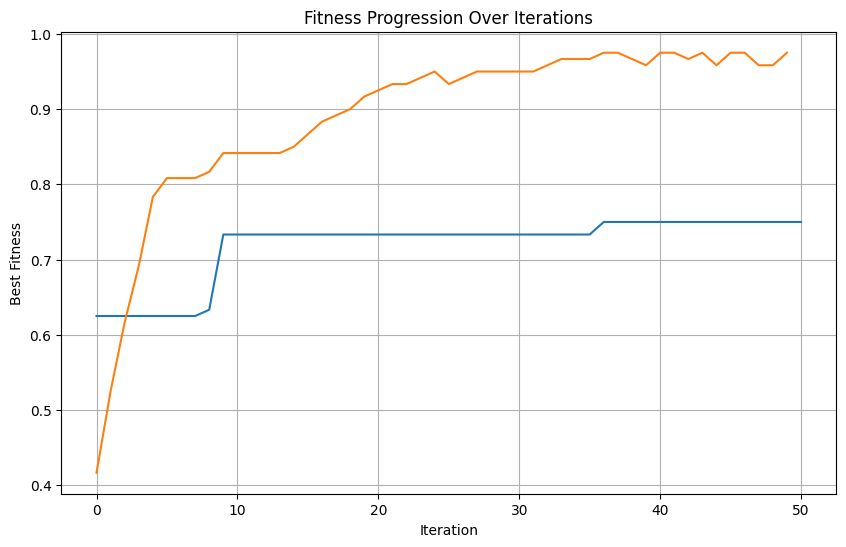

In [75]:

plt.figure(figsize=(10, 6))
plt.plot( fitenss_over_time, label='Genetic Model Accuracy')
plt.plot( train_accuracy, label='Classic Model Accuracy')
plt.xlabel("Iteration")
plt.ylabel("Best Fitness")
plt.title("Fitness Progression Over Iterations")
plt.grid(True)
plt.show()

## 2-5 Conusion Matrix of Genetic Model

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


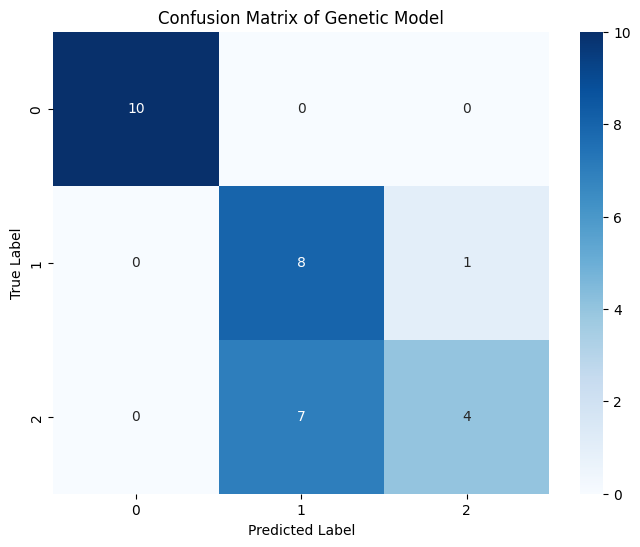

Precision: 0.7867
Recall: 0.7333


In [80]:
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt

def make_confusion_matrix(model, part, X_test, y_test):
    # Set model weights from the best individual
    particular_to_model(model, part)

    # predict test data
    y_pred = model.predict(X_test)
    y_pred_class = np.argmax(y_pred, axis=1)  # Convert predictions to class labels
    y_true = np.argmax(y_test, axis=1)  # True labels

    # Calculate confusion matrix
    cm = confusion_matrix(y_true, y_pred_class)

    # Calculate precision and recall
    precision = precision_score(y_true, y_pred_class, average='weighted')
    recall = recall_score(y_true, y_pred_class, average='weighted')

    # Display confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix of Genetic Model")
    plt.show()

    # Return precision, recall, and confusion matrix
    return precision, recall, cm



# Evaluate the genetic model on test data
precision, recall, cm = make_confusion_matrix(model, best_particular, X_test, y_test)

# Print Precision and Recall
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
